In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 14
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 1.0
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[14_10_51_300_1.0_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[14_10_51_300_1.0_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5208

Best Fitness:	1400.1181
Solution:	1400.0000
Diff:		0.1181

[0:12:51][----------] 1.96% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5103

Best Fitness:	1400.1173
Solution:	1400.0000
Diff:		0.1173

[0:25:10][----------] 3.92% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.4990

Best Fitness:	1400.1571
Solution:	1400.0000
Diff:		0.1571

[0:37:43][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5298

Best Fitness:	1400.2025
Solution:	1400.0000
Diff:		0.2025

[0:48:27][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5539

Best Fitness:	1400.0621
Solution:	1400.0000
Diff:		0.0621

[0:58:55][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5198

Best Fitness:	1400.1275
Solution:	1400.0000
Diff:		0.1275

[1:09:03][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5518

Best Fitness:	1400.1237
Solution:	1400.0000
Diff:		0.1237

[1:19:24][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5371

Best Fitness:	1400.1578
Solution:	1400.0000
Diff:		0.1578

[1:29:32][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5186

Best Fitness:	1400.1412
Solution:	1400.0000
Diff:		0.1412

[1:38:25][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5566

Best Fitness:	1400.1570
Solution:	1400.0000
Diff:		0.1570

[1:47:38][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5387

Best Fitness:	1400.1854
Solution:	1400.0000
Diff:		0.1854

[1:56:46][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5521

Best Fitness:	1400.2071
Solution:	1400.0000
Diff:		0.2071

[2:05:43][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5146

Best Fitness:	1400.1723
Solution:	1400.0000
Diff:		0.1723

[2:14:28][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5343

Best Fitness:	1400.1711
Solution:	1400.0000
Diff:		0.1711

[2:23:09][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5614

Best Fitness:	1400.2100
Solution:	1400.0000
Diff:		0.2100

[2:30:57][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5581

Best Fitness:	1400.1449
Solution:	1400.0000
Diff:		0.1449

[2:38:49][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5441

Best Fitness:	1400.1653
Solution:	1400.0000
Diff:		0.1653

[2:46:33][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5132

Best Fitness:	1400.1467
Solution:	1400.0000
Diff:		0.1467

[2:54:13][####------] 35.29% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5189

Best Fitness:	1400.1713
Solution:	1400.0000
Diff:		0.1713

[3:02:01][####------] 37.25% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5011

Best Fitness:	1400.1369
Solution:	1400.0000
Diff:		0.1369

[3:08:54][####------] 39.22% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5327

Best Fitness:	1400.1645
Solution:	1400.0000
Diff:		0.1645

[3:15:35][####------] 41.18% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.4913

Best Fitness:	1400.1375
Solution:	1400.0000
Diff:		0.1375

[3:22:12][####------] 43.14% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5269

Best Fitness:	1400.1073
Solution:	1400.0000
Diff:		0.1073

[3:28:43][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5222

Best Fitness:	1400.1033
Solution:	1400.0000
Diff:		0.1033

[3:35:20][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.4958

Best Fitness:	1400.0766
Solution:	1400.0000
Diff:		0.0766

[3:41:26][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5386

Best Fitness:	1400.0734
Solution:	1400.0000
Diff:		0.0734

[3:46:54][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.4906

Best Fitness:	1400.1840
Solution:	1400.0000
Diff:		0.1840

[3:52:20][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5623

Best Fitness:	1400.1425
Solution:	1400.0000
Diff:		0.1425

[3:57:44][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5271

Best Fitness:	1400.1435
Solution:	1400.0000
Diff:		0.1435

[4:03:09][######----] 56.86% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5046

Best Fitness:	1400.1463
Solution:	1400.0000
Diff:		0.1463

[4:08:34][######----] 58.82% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5217

Best Fitness:	1400.0859
Solution:	1400.0000
Diff:		0.0859

[4:12:56][######----] 60.78% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.4888

Best Fitness:	1400.1091
Solution:	1400.0000
Diff:		0.1091

[4:17:19][######----] 62.75% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.4911

Best Fitness:	1400.1229
Solution:	1400.0000
Diff:		0.1229

[4:21:38][######----] 64.71% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5299

Best Fitness:	1400.1764
Solution:	1400.0000
Diff:		0.1764

[4:25:55][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5415

Best Fitness:	1400.1672
Solution:	1400.0000
Diff:		0.1672

[4:30:14][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5329

Best Fitness:	1400.2046
Solution:	1400.0000
Diff:		0.2046

[4:33:55][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5297

Best Fitness:	1400.0794
Solution:	1400.0000
Diff:		0.0794

[4:37:17][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.4868

Best Fitness:	1400.0811
Solution:	1400.0000
Diff:		0.0811

[4:40:42][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5294

Best Fitness:	1400.1555
Solution:	1400.0000
Diff:		0.1555

[4:44:05][########--] 76.47% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5027

Best Fitness:	1400.0739
Solution:	1400.0000
Diff:		0.0739

[4:47:25][########--] 78.43% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.4652

Best Fitness:	1400.0859
Solution:	1400.0000
Diff:		0.0859

[4:50:33][########--] 80.39% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5181

Best Fitness:	1400.1555
Solution:	1400.0000
Diff:		0.1555

[4:53:15][########--] 82.35% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.4915

Best Fitness:	1400.1501
Solution:	1400.0000
Diff:		0.1501

[4:55:56][########--] 84.31% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.4943

Best Fitness:	1400.1546
Solution:	1400.0000
Diff:		0.1546

[4:58:37][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5229

Best Fitness:	1400.1624
Solution:	1400.0000
Diff:		0.1624

[5:01:17][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5449

Best Fitness:	1400.1281
Solution:	1400.0000
Diff:		0.1281

[5:03:51][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5120

Best Fitness:	1400.1103
Solution:	1400.0000
Diff:		0.1103

[5:06:08][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5314

Best Fitness:	1400.2015
Solution:	1400.0000
Diff:		0.2015

[5:08:25][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5241

Best Fitness:	1400.1279
Solution:	1400.0000
Diff:		0.1279

[5:10:43][##########] 96.08% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.4979

Best Fitness:	1400.0997
Solution:	1400.0000
Diff:		0.0997

[5:13:00][##########] 98.04% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	1400.5586

Best Fitness:	1400.1572
Solution:	1400.0000
Diff:		0.1572

[5:15:23][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

5:15:23

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
326,0.64733,0.544036,0.567296,0.410032,0.446869,0.335474,0.755092,0.684678,0.651981,0.736759,...,0.654667,0.894461,0.722982,0.394178,0.44257,0.610268,0.545675,0.40198,0.435125,50
327,0.64733,0.544036,0.567296,0.410032,0.446869,0.335474,0.755092,0.684678,0.651981,0.736759,...,0.654667,0.894461,0.722982,0.394178,0.44257,0.610268,0.545675,0.40198,0.435125,50
328,0.64733,0.544036,0.567296,0.410032,0.446869,0.335474,0.755092,0.684678,0.651981,0.736759,...,0.654667,0.894461,0.722982,0.394178,0.44257,0.610268,0.545675,0.40198,0.435125,50
329,0.64733,0.544036,0.567296,0.410032,0.446869,0.335474,0.755092,0.684678,0.651981,0.736759,...,0.654667,0.894461,0.722982,0.394178,0.44257,0.610268,0.545675,0.40198,0.435125,50
330,0.64733,0.544036,0.567296,0.410032,0.446869,0.335474,0.755092,0.684678,0.651981,0.736759,...,0.654667,0.894461,0.722982,0.394178,0.44257,0.610268,0.545675,0.40198,0.435125,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.11810207915095816

Best error for run 1: 0.11731369326594177

Best error for run 2: 0.15713437749604964

Best error for run 3: 0.2025348870340622

Best error for run 4: 0.06209607702317044

Best error for run 5: 0.12749195629339738

Best error for run 6: 0.1237325614583824

Best error for run 7: 0.1578317693072222

Best error for run 8: 0.14116380179984844

Best error for run 9: 0.15704190625319825

Best error for run 10: 0.18543175926947697

Best error for run 11: 0.20710337257946776

Best error for run 12: 0.17229867955052214

Best error for run 13: 0.17111571958912464

Best error for run 14: 0.21003289563554972

Best error for run 15: 0.14488703449160312

Best error for run 16: 0.16533255342665143

Best error for run 17: 0.1466686943356308

Best error for run 18: 0.17132662399035326

Best error for run 19: 0.13692655476779692

Best error for run 20: 0.16447595523573

Best error for run 21: 0.13747848781781613

Best error for run 22: 0.10728216145298575

Best error for run 23: 0.10326402166128901

Best error for run 24: 0.076643682171607

Best error for run 25: 0.07341051806702126

Best error for run 26: 0.18404236050696454

Best error for run 27: 0.14252811648520947

Best error for run 28: 0.14352503586587773

Best error for run 29: 0.1462773726807427

Best error for run 30: 0.08586512754504838

Best error for run 31: 0.10905350351549714

Best error for run 32: 0.12292223319059303

Best error for run 33: 0.1764438487134612

Best error for run 34: 0.16715213143788787

Best error for run 35: 0.20464010523392062

Best error for run 36: 0.07940708391197404

Best error for run 37: 0.08114532137165043

Best error for run 38: 0.1555202759848271

Best error for run 39: 0.07387037296621202

Best error for run 40: 0.08585787870924833

Best error for run 41: 0.15553891835111244

Best error for run 42: 0.15014488930296466

Best error for run 43: 0.15461218762402495

Best error for run 44: 0.1623758885295956

Best error for run 45: 0.12811551078902994

Best error for run 46: 0.11032355263046156

Best error for run 47: 0.20151482974029022

Best error for run 48: 0.12788266772759016

Best error for run 49: 0.09971526856497803

Best error for run 50: 0.15724797344864783

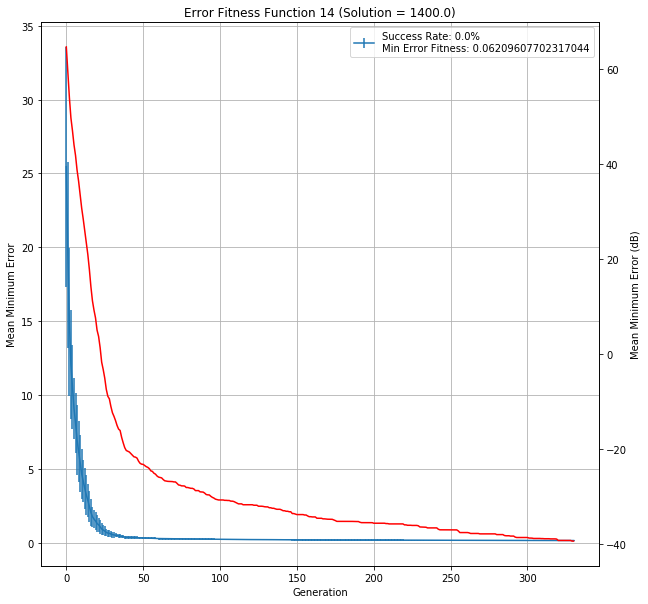

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[14_10_51_300_1.0_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,14,10,1.0,0.118102,0.117314,0.157134,0.202535,0.062096,0.127492,...,0.162376,0.128116,0.110324,0.201515,0.127883,0.099715,0.157248,0.140075,5:15:23,99900
